In [1]:
%matplotlib inline
from astropy.io import fits, ascii
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# CIV, OIII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=170.136685525))


<CompoundModel239(amplitude_0=0.9790503109908009, amplitude_1=0.1175224997542668, mean_1=170.13668552537416, stddev_1=257.3714799022793, amplitude_2=0.1175224997542668, mean_2=668.1366855253741, stddev_2=257.3714799022793)>

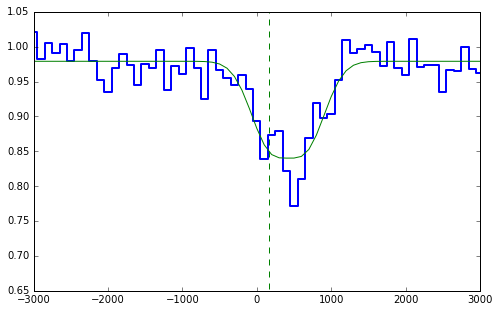

In [139]:
stack = fits.open('Output/QPQ9_zOIII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0.072,1]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=210.735181299))


<CompoundModel237(amplitude_0=0.98, amplitude_1=0.06298359101227463, mean_1=210.73518129851007, stddev_1=225.8339589707935, amplitude_2=0.062, mean_2=708.73518129851, stddev_2=225.8339589707935)>

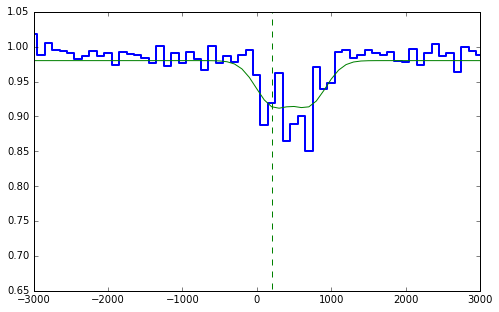

In [138]:
stack = fits.open('Output/QPQ9_zOIII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
model_init.amplitude_0.fixed = True
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0,0.062]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_median_fit.dat')
model_final

# CIV, MgII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=54.7420081839))


<CompoundModel243(amplitude_0=0.9778106533481975, amplitude_1=0.04856956486861719, mean_1=54.742008183925485, stddev_1=359.27631842491365, amplitude_2=0.04856956486861719, mean_2=552.7420081839255, stddev_2=359.27631842491365)>

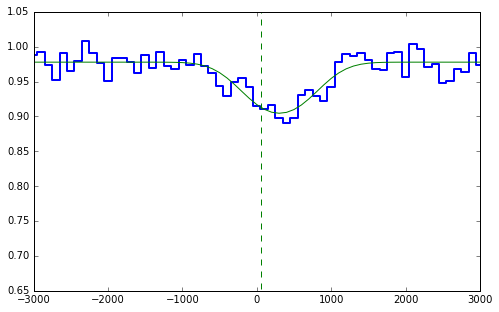

In [141]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=300.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=300.)
c_init = models.Const1D(amplitude=0.97)
model_init = c_final*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_mean_fit.dat')
model_final

('Centroid velocity in km/s = ', Parameter('mean_1', value=138.714298875))


<CompoundModel245(amplitude_0=0.9871972150325854, amplitude_1=0.022876960449678727, mean_1=138.71429887479738, stddev_1=311.6213333889339, amplitude_2=0.022876960449678727, mean_2=636.7142988747974, stddev_2=311.6213333889339)>

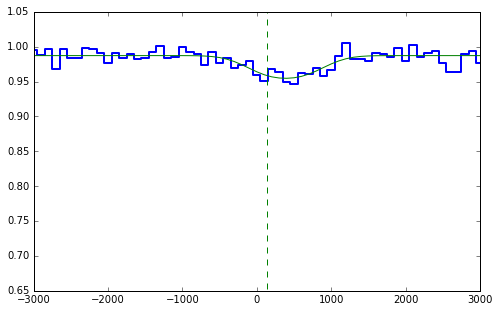

In [142]:
stack = fits.open('Output/QPQ9_zIRMgII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_1548_init*g_1550_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.amplitude_2.bounds = [0.02/2,0.02]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_median_fit.dat')
model_final

# CII, OIII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=207.229632716))
('Error in centroid and dispersion = ', 0.01170666412375309, 30.730080573942001)


<CompoundModel246(amplitude_0=0.9755637371138843, amplitude_1=0.15401455976393483, mean_1=207.22963271559578, stddev_1=355.4042390075306)>

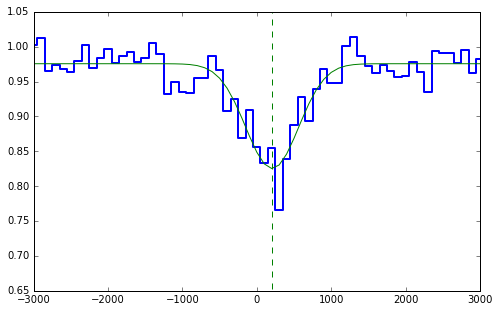

In [143]:
stack = fits.open('Output/QPQ9_zOIII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=170.,stddev=388.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=60.3807728443))
('Error in centroid and dispersion = ', 0.0067746428024953462, 48.156195650980365)


<CompoundModel247(amplitude_0=0.9867053813633883, amplitude_1=0.049075194644879035, mean_1=60.38077284425724, stddev_1=307.30881500405235)>

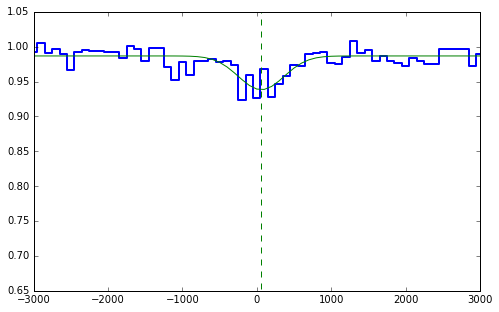

In [144]:
stack = fits.open('Output/QPQ9_zOIII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_median_fit.dat')
model_final

# CII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=169.669122094))
('Error in centroid and dispersion = ', 0.010040781980250711, 35.108815025502423)


<CompoundModel249(amplitude_0=0.9706929268167396, amplitude_1=0.12582677397879097, mean_1=169.6691220944282, stddev_1=388.24430023701484)>

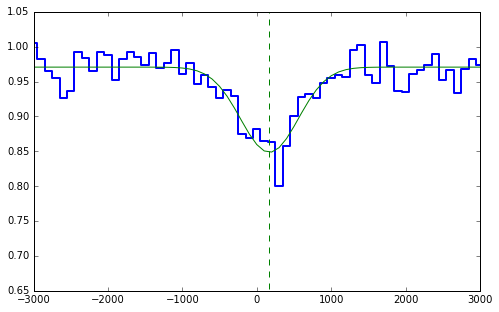

In [146]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_mean_fit.dat')
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=51.0406390917))
('Error in centroid and dispersion = ', 0.0063366962679647582, 48.247609310737516)


<CompoundModel250(amplitude_0=0.9849971222308531, amplitude_1=0.04669233162766167, mean_1=51.0406390916569, stddev_1=313.44623804800267)>

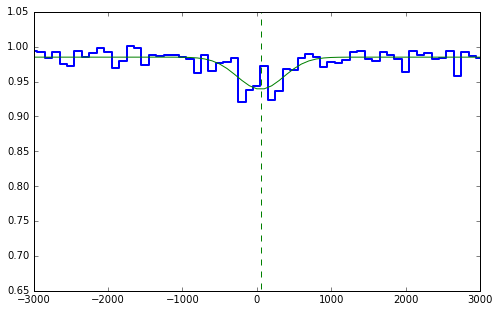

In [147]:
stack = fits.open('Output/QPQ9_zIRMgII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=100.,stddev=300.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*g_init
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_median_fit.dat')
model_final

# MgII, OIII stack

## Mean stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=288.567151651))


<CompoundModel252(amplitude_0=0.9504782580770319, amplitude_1=0.16720356518550836, mean_1=288.56715165061877, stddev_1=277.82508040227873, amplitude_2=0.11500936631543363, mean_2=1057.5671516506188, stddev_2=277.82508040227873)>

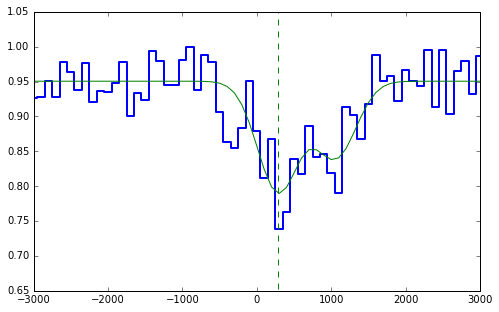

In [148]:
stack = fits.open('Output/QPQ9_zOIII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=200.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=969.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=253.640207263))


<CompoundModel254(amplitude_0=0.9801547982477812, amplitude_1=0.12981426083783432, mean_1=253.64020726342272, stddev_1=205.19853122817753, amplitude_2=0.07005123481699665, mean_2=1022.6402072634228, stddev_2=205.19853122817753)>

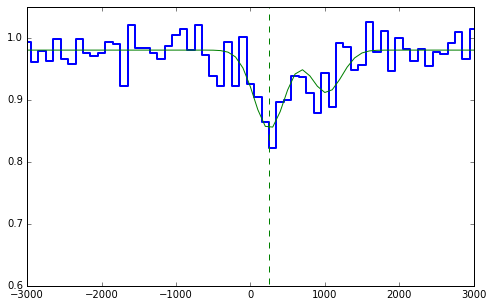

In [149]:
stack = fits.open('Output/QPQ9_zOIII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.6,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_median_fit.dat')
model_final

# MgII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=157.047979461))


<CompoundModel294(amplitude_0=0.9806036272569058, amplitude_1=0.08374020090643239, mean_1=157.04797946104898, stddev_1=338.5384932760339, amplitude_2=0.07035214597821104, mean_2=926.047979461049, stddev_2=338.5384932760339)>

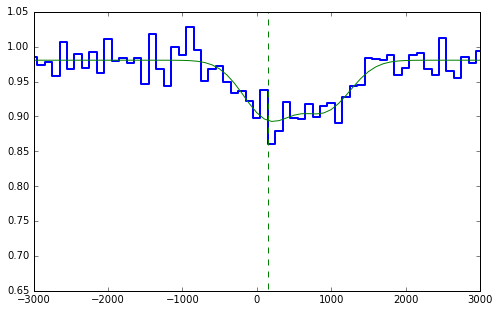

In [169]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=400.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1169.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_mean_fit.dat')
model_final

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=-17.6073767218))
('Error in centroid and dispersion = ', 36.062271414122115, 29.97846260836068)


<CompoundModel296(amplitude_0=0.9867297444454732, amplitude_1=0.038389304354101886, mean_1=-17.607376721785784, stddev_1=203.08549063053664, amplitude_2=0.051175069539855976, mean_2=751.3926232782142, stddev_2=203.08549063053664)>

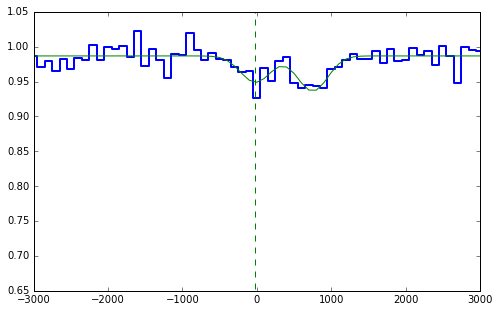

In [170]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.05,mean=869.,stddev=250.)
c_init = models.Const1D(amplitude=0.99)
model_init = c_init*g_2796_init*g_2803_init
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
#model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#For some reason this line failed
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_median_fit.dat')
model_final

# MgII at z = 1 stack

## Mean stack  

('Centroid velocity in km/s = ', Parameter('mean_1', value=47.5667328557))


<CompoundModel270(amplitude_0=0.9935946382413559, amplitude_1=0.0367919579682289, mean_1=47.566732855680456, stddev_1=168.97198802212438, amplitude_2=0.025129321998581835, mean_2=816.5667328556805, stddev_2=168.97198802212438)>

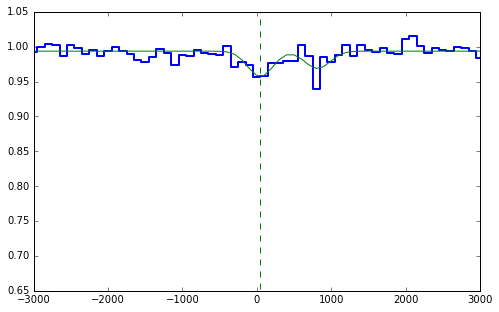

In [157]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][1][1]),np.sqrt(fit.fit_info['param_cov'][2][2]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_mean_fit.dat')
model_final

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=9.08420606219))


<CompoundModel276(amplitude_0=0.9991636293502946, amplitude_1=0.02151676154942305, mean_1=9.084206062192548, stddev_1=202.5544244864166, amplitude_2=0.014078953891724652, mean_2=778.0842060621925, stddev_2=202.5544244864166)>

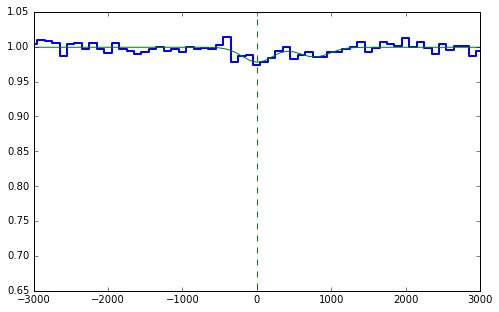

In [160]:
stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*g_2796_init*g_2803_init
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value,stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value,model_final(velo.value),label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_median_fit.dat')
model_final

# CIV foreground quasar stack 

<CompoundModel92(slope_0=1.6216453676836206e-06, intercept_0=0.9835803072187345, amplitude_1=0.028672582135876, mean_1=-2512.039953476008, stddev_1=2079.834165724614, amplitude_2=0.028672582135876, mean_2=-2014.0399534760081, stddev_2=2079.834165724614)>

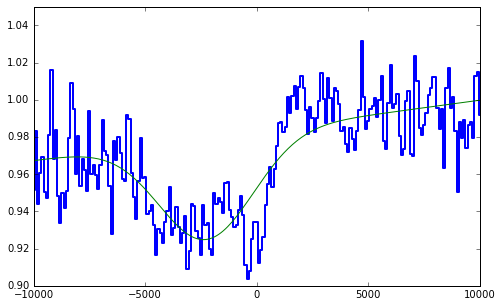

In [60]:
CIV_stack = fits.open('Output/QPQ9_1548_fg_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g1_1548_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.,stddev=1000.)
g1_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.+498.,stddev=1000.)
#g2_1548_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.,stddev=500.)
#g2_1550_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.+498.,stddev=500.)
l_init = models.Linear1D(intercept=0.97,slope=0.00001)
#model_init = l_init*(g1_1548_init*g1_1550_init)*(g2_1548_init*g2_1550_init)
model_init = l_init*(g1_1548_init*g1_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#def tie_mean4(model):
#    mean_4 = model.mean_3 + 498.
#    return mean_4
#def tie_stddev4(model):
#    stddev_4 = model.stddev_3
#    return stddev_4
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.mean_4.tied = tie_mean4
#model_init.stddev_4.tied = tie_stddev4
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.axis([-10000,10000,0.90,1.05])
model_final
